In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
from transformers import AdamW
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import SequentialSampler
from transformers import BertModel, BertTokenizer

In [2]:
df=pd.read_csv(r"/storage/research/data/abusive_content_1/hate_speech_data.tsv",sep='\t',header=None)
df

,0,1
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,no
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,no
2,Doctor sab sahi me ke PhD (in hate politics) ...,no
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,no
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,yes
...,...,...
4574,ye attankwadi Indian agent hai jo terrorism ph...,no
4575,bola na terrorism ko support karna band karoge...,no
4576,lagta hai aap ne movie dekhi hai which is writ...,no
4577,tum log terrorism ko support karna band kardo ...,no


In [3]:
df.columns=['text','label']
df

,text,label
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,no
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,no
2,Doctor sab sahi me ke PhD (in hate politics) ...,no
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,no
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,yes
...,...,...
4574,ye attankwadi Indian agent hai jo terrorism ph...,no
4575,bola na terrorism ko support karna band karoge...,no
4576,lagta hai aap ne movie dekhi hai which is writ...,no
4577,tum log terrorism ko support karna band kardo ...,no


In [4]:
df.shape

(4579, 2)

In [5]:
df.isnull().sum()

text     1
label    0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
df[df['label']=='yes'].count()

text     1660
label    1660
dtype: int64

In [9]:
df[df['label']=='no'].count()

text     2914
label    2914
dtype: int64

In [10]:
df.loc[:,'text']=df['text'].map(lambda x:x.lower())
df

C:\Users\karti\AppData\Local\Temp\ipykernel_8380\1228327605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'text']=df['text'].map(lambda x:x.lower())


,text,label
0,knowing ki vikas kitna samjhata hai priyanka a...,no
1,i am muhajir .. aur mere lye sab se pehly paki...,no
2,doctor sab sahi me ke phd (in hate politics) ...,no
3,poore desh me patel obc me aate hain sirf gujr...,no
4,sarkar banne ke bad hindu hit me ek bhi faisla...,yes
...,...,...
4574,ye attankwadi indian agent hai jo terrorism ph...,no
4575,bola na terrorism ko support karna band karoge...,no
4576,lagta hai aap ne movie dekhi hai which is writ...,no
4577,tum log terrorism ko support karna band kardo ...,no


In [11]:
nltk.download('stopwords')
# nltk_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# all_stopwords = set(nltk_stopwords).union(custom_stopwords)

In [13]:
# def remove_stopwords(text):
#     tokens = text.split()
#     filtered_tokens = [word for word in tokens if word not in all_stopwords]
#     return ' '.join(filtered_tokens)
# df.loc[:,'text'] = df['text'].apply(remove_stopwords)
# df

In [14]:
df.to_csv("Ahate.csv")

In [15]:
df.size

9156

In [16]:
df1=df.copy()

In [17]:
df1

,text,label
0,knowing ki vikas kitna samjhata hai priyanka a...,no
1,i am muhajir .. aur mere lye sab se pehly paki...,no
2,doctor sab sahi me ke phd (in hate politics) ...,no
3,poore desh me patel obc me aate hain sirf gujr...,no
4,sarkar banne ke bad hindu hit me ek bhi faisla...,yes
...,...,...
4574,ye attankwadi indian agent hai jo terrorism ph...,no
4575,bola na terrorism ko support karna band karoge...,no
4576,lagta hai aap ne movie dekhi hai which is writ...,no
4577,tum log terrorism ko support karna band kardo ...,no


In [18]:
df['label'].value_counts()

no     2914
yes    1660
n         2
on        2
Name: label, dtype: int64

In [19]:
df=df[(df['label']=='yes')|(df['label']=='no')]

In [20]:
df['label'].value_counts()

no     2914
yes    1660
Name: label, dtype: int64

In [21]:
df['label']=df['label'].map({'no':0,'yes':1})

C:\Users\karti\AppData\Local\Temp\ipykernel_8380\1579229125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=df['label'].map({'no':0,'yes':1})


In [22]:
df

,text,label
0,knowing ki vikas kitna samjhata hai priyanka a...,0
1,i am muhajir .. aur mere lye sab se pehly paki...,0
2,doctor sab sahi me ke phd (in hate politics) ...,0
3,poore desh me patel obc me aate hain sirf gujr...,0
4,sarkar banne ke bad hindu hit me ek bhi faisla...,1
...,...,...
4574,ye attankwadi indian agent hai jo terrorism ph...,0
4575,bola na terrorism ko support karna band karoge...,0
4576,lagta hai aap ne movie dekhi hai which is writ...,0
4577,tum log terrorism ko support karna band kardo ...,0


In [23]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df['label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [24]:
bert= BertModel.from_pretrained('bert-base-multilingual-cased')
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

C:\Users\karti\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\karti\.cache\huggingface\hub\models--bert-base-multilingual-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

<Axes: >

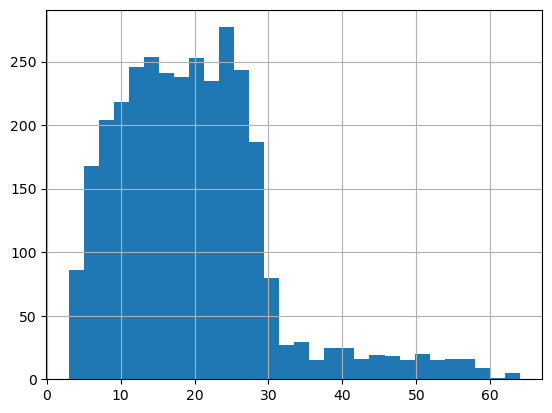

In [25]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [26]:
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

C:\Users\karti\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [27]:
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)


In [28]:
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)


In [29]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [30]:
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [31]:
for param in bert.parameters():
    param.requires_grad = False

In [32]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        
        self.bert = bert 
        
        # dropout layer
        self.dropout = nn.Dropout(0.1)
      
        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 512)
      
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)

        # softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    # define the forward pass
    def forward(self, sent_id, mask):
        
        # pass the inputs to the model  
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
      
        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)
      
        # apply softmax activation
        x = self.softmax(x)

        return x

In [33]:
model = BERT_Arch(bert)

In [34]:
optimizer = AdamW(model.parameters(), lr=1e-5, betas=(0.9, 0.999))




#compute the class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)

print('Class Weights:',class_weights)

Class Weights: [0.7849436  1.37736661]


C:\Users\karti\anaconda3\Lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [35]:
weights= torch.tensor(class_weights,dtype=torch.float)

In [36]:
cross_entropy  = nn.NLLLoss(weight=weights) 
epochs=100

In [37]:
def train():
    
    model.train()
    total_loss, total_accuracy = 0, 0
  
    # empty list to save model predictions
    total_preds=[]
  
    # iterate over batches
    for step,batch in enumerate(train_dataloader):
        
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
 
        sent_id, mask, labels = batch
        
        # clear previously calculated gradients 
        model.zero_grad()        

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
  
      # predictions are in the form of (no. of batches, size of batch, no. of classes).
      # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds

In [38]:
def evaluate():
    
    print("\nEvaluating...")
  
    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0
    
    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):
        
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():
            
            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader) 

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [39]:
best_valid_loss = float('inf')

#defining epochs
epochs = 100

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 2
  Batch    50  of    101.
  Batch   100  of    101.

Evaluating...

Training Loss: 0.694
Validation Loss: 0.693

 Epoch 2 / 2
  Batch    50  of    101.
  Batch   100  of    101.

Evaluating...

Training Loss: 0.693
Validation Loss: 0.692


In [40]:
cpu = torch.device('cpu')
with torch.no_grad():
    preds = model(test_seq.to(cpu), test_mask.to(cpu))
    preds = preds.detach().cpu().numpy()


# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.64      0.87      0.74       438
           1       0.39      0.15      0.22       249

    accuracy                           0.61       687
   macro avg       0.52      0.51      0.48       687
weighted avg       0.55      0.61      0.55       687

